#  Artificial Neural Network (ANN)
<img src="https://i.imgur.com/WPlPxI7.png" alt="ANN" width="300"/>

* Import
* Dataset - MNIST
* DataLoader
* Model
* Loss Function & Optimizer
* Training Model
* Save & Load Model


## Import

In [1]:
import torch

# For Dataset
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

# For Model Training
import torch.nn as nn
import torch.optim as opt

import matplotlib.pyplot as plt

## Dataset - MNIST

In [2]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [6]:
# features (images)
train_dataset.data.shape # 6000 sample, 28x28 

torch.Size([60000, 28, 28])

In [9]:
# target (labels)
train_dataset.targets, train_dataset.targets.shape

(tensor([5, 0, 4,  ..., 5, 6, 8]), torch.Size([60000]))

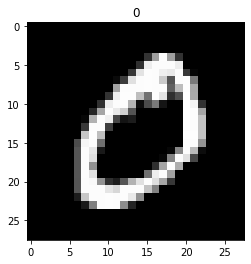

In [10]:
# plot first image
plt.imshow(train_dataset.data[1], cmap='gray')
plt.title('%i' %train_dataset.targets[1])
plt.show()

## DataLoader

In [12]:
# Define batch_size
train_batch_size = 64
test_batch_size = 10000

# Create Dataloader 
train_loader = DataLoader(
    dataset = train_dataset,
    batch_size = train_batch_size,
    shuffle = True
    )

test_loader = DataLoader(
    dataset = test_dataset,
    batch_size = test_batch_size,
    shuffle = False
    )

In [13]:
for images, labels in train_loader:
    print(images.shape, labels.shape)
    print(labels)
    break

torch.Size([64, 1, 28, 28]) torch.Size([64])
tensor([0, 0, 5, 8, 1, 5, 9, 9, 1, 6, 1, 6, 2, 1, 3, 7, 3, 7, 7, 7, 0, 1, 0, 7,
        7, 6, 9, 6, 4, 5, 2, 6, 0, 7, 8, 0, 6, 3, 2, 9, 8, 2, 5, 1, 6, 9, 9, 5,
        4, 5, 1, 3, 5, 4, 9, 7, 6, 0, 1, 5, 0, 4, 6, 4])


## Model

In [14]:
# hyperparameters
input_size = 28 * 28 # 1*28*28=784
num_class = 10 
hidden_size = 500

In [15]:
class ANN(nn.Module):
    def __init__(self, 
                 input_size, 
                 hidden_size, 
                 num_class):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(
            in_features=input_size,
            out_features=hidden_size
        )
        self.fc2 = nn.Linear(
            in_features=500,
            out_features=num_class
        )
        self.relu = nn.ReLU()

    def forward(self, x):
        output = self.fc1(x)
        output = self.relu(output)
        output = self.fc2(output)
        return output       

In [16]:
# build ANN Object
model = ANN(
    input_size=input_size,
    hidden_size=hidden_size,
    num_class=num_class 
)
print(model)

ANN(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (relu): ReLU()
)


## Loss Fuction & Optimizer

In [17]:
# hyperparameter
learning_rate = 0.00002

loss_func = nn.CrossEntropyLoss() 
optimizer = opt.Adam(model.parameters(), lr=learning_rate)

## Training Model

In [18]:
# hyperparameter
num_epoch = 10

for epoch in range(num_epoch):
    for i, (images, labels) in enumerate(train_loader):
        # images are 100(batch_size) * 28*28 tensor.
        images = images.view(-1, 28*28) # -1 means 100 here
        labels = labels
        
        optimizer.zero_grad() # clear buffer
        output = model(images) # forward pass
        loss = loss_func(output, labels) # calculate loss
        
        loss.backward() # backward pass
        optimizer.step() # update weights
        
        if (i+1) % 200 == 0:
            print('Epoch: {}, Batch: {}, Loss: {}'.format(epoch+1, i+1, loss.data))

Epoch: 1, Batch: 200, Loss: 1.9639972448349
Epoch: 1, Batch: 400, Loss: 1.3726210594177246
Epoch: 1, Batch: 600, Loss: 1.1176190376281738
Epoch: 1, Batch: 800, Loss: 0.9227930307388306
Epoch: 2, Batch: 200, Loss: 0.6889527440071106
Epoch: 2, Batch: 400, Loss: 0.521935224533081
Epoch: 2, Batch: 600, Loss: 0.547147274017334
Epoch: 2, Batch: 800, Loss: 0.7201372981071472
Epoch: 3, Batch: 200, Loss: 0.508754551410675
Epoch: 3, Batch: 400, Loss: 0.5370924472808838
Epoch: 3, Batch: 600, Loss: 0.430151104927063
Epoch: 3, Batch: 800, Loss: 0.235286146402359
Epoch: 4, Batch: 200, Loss: 0.4026166796684265
Epoch: 4, Batch: 400, Loss: 0.3874455988407135
Epoch: 4, Batch: 600, Loss: 0.5879840850830078
Epoch: 4, Batch: 800, Loss: 0.35168012976646423
Epoch: 5, Batch: 200, Loss: 0.3708164691925049
Epoch: 5, Batch: 400, Loss: 0.3811619281768799
Epoch: 5, Batch: 600, Loss: 0.3894806504249573
Epoch: 5, Batch: 800, Loss: 0.39648744463920593
Epoch: 6, Batch: 200, Loss: 0.2981175184249878
Epoch: 6, Batch: 40

## Testing Model

* Calculate accuracy

In [19]:
correct = 0
total = 0

for images, labels in test_loader:
    images = images.view(-1, 28*28)
    
    output = model(images)
    # _, predicted = torch.max(output.data, 1) # 1 means by column;
    predicted = torch.argmax(output.data, 1)

    total += labels.size(0) # len;
    correct += (predicted == labels).sum()
    
print('accuracy: {} %'.format(correct/total * 100))

accuracy: 92.81999969482422 %


In [20]:
# example of images.view
a = torch.ones([100, 1, 28, 28])
torch.numel(a)

a.view(-1, 784).shape # batch, images shape

torch.Size([100, 784])

## Save & Load Model

* Method 1: save model's weight
* Method 2: save entire model

In [21]:
# method 1: save model weight
torch.save(model.state_dict(), 'model.pkl')

# load weight
model = ANN(input_size, hidden_size, num_class)
model.load_state_dict(torch.load('model.pkl'))

<All keys matched successfully>

In [22]:
# method 2: save entire model
torch.save(model, 'model2.pkl')
model3 = torch.load('model2.pkl') 